In [40]:
# Importing Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score if required
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv('NJSchool.csv')

In [42]:
pd.get_option('display.max_columns', None)
df

,City,Costs,Year1,Year2,Year3,Year4,Year5,avg_prop_tax
0,Absecon City,Total Budgetary Comparative Per Pupil Cost,12878,13578,15479,16089,16022,5554
1,Atlantic City,Total Budgetary Comparative Per Pupil Cost,17954,17088,20549,21555,22287,4826
2,Atlantic Co Vocational,Total Budgetary Comparative Per Pupil Cost,13584,14114,16376,15921,15829,4826
3,Atlantic Co Special Serv,Total Budgetary Comparative Per Pupil Cost,52786,51796,58174,60564,56197,4826
4,Brigantine City,Total Budgetary Comparative Per Pupil Cost,24726,26157,29128,33756,31985,6266
...,...,...,...,...,...,...,...,...
562,Warren County Vocational,Total Budgetary Comparative Per Pupil Cost,17420,16914,20396,19328,18955,8736
563,Warren Hills Regional,Total Budgetary Comparative Per Pupil Cost,17532,17698,18679,19583,19928,8736
564,Washington Boro,Total Budgetary Comparative Per Pupil Cost,15322,16088,18349,20038,18312,7380
565,Washington Twp,Total Budgetary Comparative Per Pupil Cost,18631,18621,20229,22182,20013,8847


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          567 non-null    object
 1   Costs         567 non-null    object
 2   Year1         567 non-null    int64 
 3   Year2         567 non-null    int64 
 4   Year3         567 non-null    int64 
 5   Year4         567 non-null    int64 
 6   Year5         567 non-null    int64 
 7   avg_prop_tax  567 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 35.6+ KB


In [44]:
df1 = pd.read_csv('NJ_SchAnalysis1.csv')

In [45]:
df1.head()

,District_Name,2018-19 Actual Per Pupil Amount,2019-20 Budgeted Per Pupil Amount,2018-19 Extra_curricular Actual Per Pupil Amount,2019-20 Extra_curricular Actual Per Pupil Amount,2018-19 Student/Teacher Ratio,2019-20 Student/Teacher Ratio
0,Edgewater Boro,11733,11205,16,14,14.3,13.1
1,Oradell Boro,15008,15821,40,38,11.4,11.7
2,River Edge Boro,13882,14362,N.R.,27,13.1,13.2
3,Saddle River Boro,26297,24557,30,N.R.,8.8,8.5
4,Bass River Twp,20646,21276,208,174,8.3,7.3


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   District_Name                                     659 non-null    object
 1   2018-19 Actual Per Pupil Amount                   659 non-null    int64 
 2   2019-20 Budgeted Per Pupil Amount                 659 non-null    int64 
 3   2018-19 Extra_curricular Actual Per Pupil Amount  659 non-null    object
 4   2019-20 Extra_curricular Actual Per Pupil Amount  659 non-null    object
 5   2018-19 Student/Teacher Ratio                     659 non-null    object
 6   2019-20 Student/Teacher Ratio                     659 non-null    object
dtypes: int64(2), object(5)
memory usage: 36.2+ KB


In [47]:
#df1['2018-19 Extra_curricular Actual Per Pupil Amount'] = pd.to_numeric(df1['2018-19 Extra_curricular Actual Per Pupil Amount'],errors='coerce')

In [48]:
df1['2019-20 Extra_curricular Actual Per Pupil Amount'] = pd.to_numeric(df1['2019-20 Extra_curricular Actual Per Pupil Amount'],errors='coerce')

In [49]:
#df1['2018-19 Student/Teacher Ratio'] = pd.to_numeric(df1['2018-19 Student/Teacher Ratio'],errors='coerce')

In [50]:
df1['2019-20 Student/Teacher Ratio'] = pd.to_numeric(df1['2019-20 Student/Teacher Ratio'],errors='coerce')

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   District_Name                                     659 non-null    object 
 1   2018-19 Actual Per Pupil Amount                   659 non-null    int64  
 2   2019-20 Budgeted Per Pupil Amount                 659 non-null    int64  
 3   2018-19 Extra_curricular Actual Per Pupil Amount  659 non-null    object 
 4   2019-20 Extra_curricular Actual Per Pupil Amount  551 non-null    float64
 5   2018-19 Student/Teacher Ratio                     659 non-null    object 
 6   2019-20 Student/Teacher Ratio                     657 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 36.2+ KB


In [52]:
df1 = df1.rename(columns = {"District_Name":"City"})
  
df1

,City,2018-19 Actual Per Pupil Amount,2019-20 Budgeted Per Pupil Amount,2018-19 Extra_curricular Actual Per Pupil Amount,2019-20 Extra_curricular Actual Per Pupil Amount,2018-19 Student/Teacher Ratio,2019-20 Student/Teacher Ratio
0,Edgewater Boro,11733,11205,16,14.0,14.3,13.1
1,Oradell Boro,15008,15821,40,38.0,11.4,11.7
2,River Edge Boro,13882,14362,N.R.,27.0,13.1,13.2
3,Saddle River Boro,26297,24557,30,NaN,8.8,8.5
4,Bass River Twp,20646,21276,208,174.0,8.3,7.3
...,...,...,...,...,...,...,...
654,College Achieve Central Charter School,12047,11496,N.R.,NaN,13.9,16.2
655,Cresthaven Academy Charter School,11804,12731,N.R.,NaN,11.0,10.2
656,Queen City Academy Cs,11758,12688,84,NaN,11.6,11.2
657,Union County Teams Cs,12306,14526,N.R.,NaN,19.5,29.4


In [53]:
df = df.drop(['Costs'], axis=1)

In [54]:
df = df.drop(['Year1', 'Year2', 'Year3', 'Year4', 'Year5'], axis=1)

In [55]:
df1 = df1.drop(['2018-19 Actual Per Pupil Amount', '2018-19 Extra_curricular Actual Per Pupil Amount', '2018-19 Student/Teacher Ratio'], axis=1)

In [56]:
df.head()

,City,avg_prop_tax
0,Absecon City,5554
1,Atlantic City,4826
2,Atlantic Co Vocational,4826
3,Atlantic Co Special Serv,4826
4,Brigantine City,6266


In [57]:
#Merging the property tax data with the NJ school data


df_final = pd.merge(df, df1, on='City', how='outer')

In [58]:
df_final.head()

,City,avg_prop_tax,2019-20 Budgeted Per Pupil Amount,2019-20 Extra_curricular Actual Per Pupil Amount,2019-20 Student/Teacher Ratio
0,Absecon City,5554.0,14709.0,108.0,11.5
1,Atlantic City,4826.0,19703.0,139.0,10.5
2,Atlantic Co Vocational,4826.0,16078.0,475.0,12.2
3,Atlantic Co Special Serv,4826.0,58965.0,NaN,6.6
4,Brigantine City,6266.0,26493.0,336.0,8.0


In [59]:
# Missing values

print('Percentage of missing values across columns-\n', df_final.isnull().mean().round(4)*100)

Percentage of missing values across columns-
 City                                                 0.00
avg_prop_tax                                        14.02
2019-20 Budgeted Per Pupil Amount                    0.99
2019-20 Extra_curricular Actual Per Pupil Amount    16.71
2019-20 Student/Teacher Ratio                        1.27
dtype: float64


In [60]:
#duplicate values check
df_final.duplicated().sum()

0

In [61]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_prop_tax,607.0,8884.316310,3514.819960,1728.0,6578.0,8407.0,10304.50,24573.0
2019-20 Budgeted Per Pupil Amount,699.0,17951.025751,6119.782820,8786.0,15219.5,17039.0,19380.50,95074.0
2019-20 Extra_curricular Actual Per Pupil Amount,588.0,351.644558,326.750869,5.0,126.0,259.0,456.25,2316.0
2019-20 Student/Teacher Ratio,697.0,11.188522,2.651076,2.9,9.9,11.2,12.20,30.0


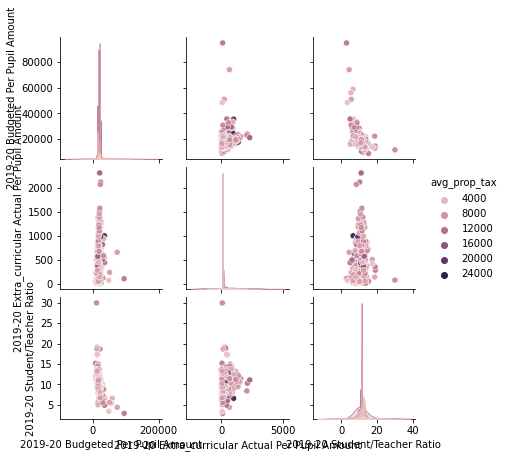

In [62]:
sns.pairplot(df_final, hue='avg_prop_tax',
             vars=['2019-20 Budgeted Per Pupil Amount', '2019-20 Extra_curricular Actual Per Pupil Amount', '2019-20 Student/Teacher Ratio'], size=2)
plt.show()

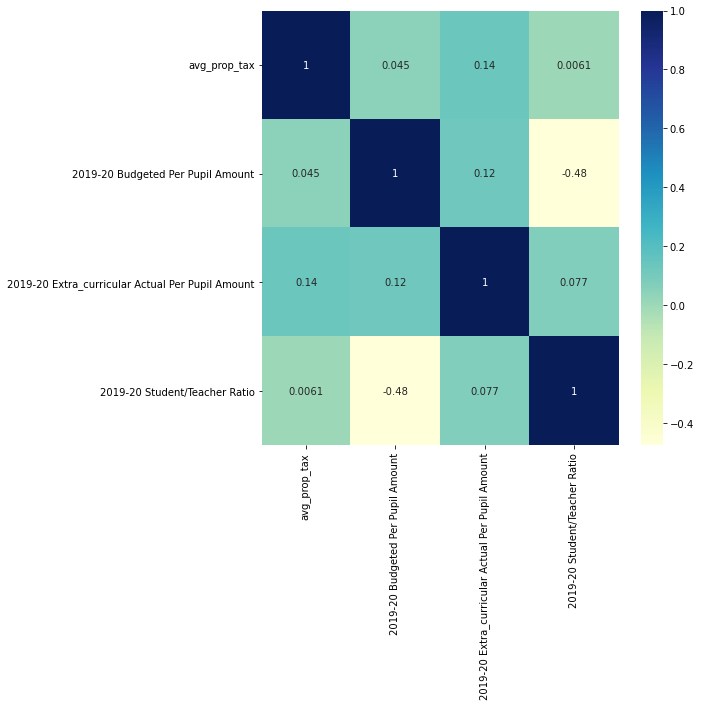

In [63]:
plt.figure(figsize=(8,8))
sns.heatmap(df_final.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [64]:
# Imputing missing values using Means for columns

#We will impute missing  values for the 'Price' variables with the mean and check our results
df_final['avg_prop_tax'].fillna(df_final['avg_prop_tax'].mean(), inplace = True)

df_final['2019-20 Budgeted Per Pupil Amount'].fillna(df_final['2019-20 Budgeted Per Pupil Amount'].mean(), inplace = True)

df_final['2019-20 Student/Teacher Ratio'].fillna(df_final['2019-20 Student/Teacher Ratio'].mean(), inplace = True)

df_final['2019-20 Extra_curricular Actual Per Pupil Amount'].fillna(df_final['2019-20 Extra_curricular Actual Per Pupil Amount'].mean(), inplace = True)

In [65]:
print('Percentage of missing values across columns-\n', df_final.isnull().mean().round(4)*100)

Percentage of missing values across columns-
 City                                                0.0
avg_prop_tax                                        0.0
2019-20 Budgeted Per Pupil Amount                   0.0
2019-20 Extra_curricular Actual Per Pupil Amount    0.0
2019-20 Student/Teacher Ratio                       0.0
dtype: float64


In [66]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 5 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   City                                              706 non-null    object 
 1   avg_prop_tax                                      706 non-null    float64
 2   2019-20 Budgeted Per Pupil Amount                 706 non-null    float64
 3   2019-20 Extra_curricular Actual Per Pupil Amount  706 non-null    float64
 4   2019-20 Student/Teacher Ratio                     706 non-null    float64
dtypes: float64(4), object(1)
memory usage: 33.1+ KB


In [67]:
#Checking for the township with the highest avg. property tax 
high_prop = df_final.groupby('avg_prop_tax').max()
high_prop

,City,2019-20 Budgeted Per Pupil Amount,2019-20 Extra_curricular Actual Per Pupil Amount,2019-20 Student/Teacher Ratio
avg_prop_tax,,,,
1728.0,Camden County Vocational,21987.0,771.0,13.7
1965.0,Woodbine Boro,15746.0,29.0,9.6
2054.0,Lower Alloways Creek,19901.0,6.0,7.9
2542.0,Cumberland Regional,18669.0,972.0,12.7
3189.0,Dennis Twp,18141.0,214.0,9.3
...,...,...,...,...
20983.0,Mountain Lakes Boro,24290.0,980.0,9.3
21036.0,Rumson-Fair Haven Reg,17607.0,1380.0,11.9
21146.0,Tenafly Boro,17475.0,424.0,12.0


* Millburn Township has the highest avg. property tax, followed by Alpine Boro and Tenafly Boro
* We will check for the township with highest Budgeted Per Pupil Amount, the Extra_curricular Actual Per Pupil Amount, and the lowest Student/Teacher Ratio

In [68]:
high_per_pupil = df_final.groupby('2019-20 Budgeted Per Pupil Amount').max()
high_per_pupil

,City,avg_prop_tax,2019-20 Extra_curricular Actual Per Pupil Amount,2019-20 Student/Teacher Ratio
2019-20 Budgeted Per Pupil Amount,,,,
8786.0,Fairview Boro,10085.00000,50.000000,15.2
9255.0,Learning Community Cs,8884.31631,351.644558,14.3
9308.0,Vineland Public Charter School,8884.31631,351.644558,11.7
9438.0,Jersey City Global Cs,8884.31631,351.644558,20.7
9634.0,East Newark Boro,6886.00000,52.000000,12.1
...,...,...,...,...
56135.0,Cape May Co Special Serv,4300.00000,351.644558,5.4
58965.0,Atlantic Co Special Serv,4826.00000,351.644558,6.6
72515.0,Mercer County Special Services School Di,8884.31631,5.000000,5.5


* The top three districts are Bergen Co Special Service, Burlington Co Special Service, and Mercer County Special Service

In [69]:
high_extra_cur = df_final.groupby('2019-20 Extra_curricular Actual Per Pupil Amount').max()
high_extra_cur

,City,avg_prop_tax,2019-20 Budgeted Per Pupil Amount,2019-20 Student/Teacher Ratio
2019-20 Extra_curricular Actual Per Pupil Amount,,,,
5.0,Mercer County Special Services School Di,19862.0,72515.0,7.7
6.0,Lower Alloways Creek,14156.0,22723.0,9.1
7.0,Totowa Boro,10949.0,17705.0,13.6
11.0,Little Egg Harbor Twp,5152.0,16281.0,11.9
13.0,Chesterfield Twp,11366.0,15362.0,11.2
...,...,...,...,...
1507.0,Ramapo-Indian Hill Reg,13499.0,20673.0,10.6
1579.0,N Hunt/Voorhees Regional,8736.0,21696.0,11.5
2077.0,Henry Hudson Regional,8736.0,23160.0,8.4


* Top 3 townships are Shore regional, Delware Valley Regional, and Henry Hudson regional

In [70]:
low_s_t_ratio = df_final.groupby('2019-20 Student/Teacher Ratio').min()
low_s_t_ratio

,City,avg_prop_tax,2019-20 Budgeted Per Pupil Amount,2019-20 Extra_curricular Actual Per Pupil Amount
2019-20 Student/Teacher Ratio,,,,
2.9,Bergen Co Special Service,10678.00000,95074.0,103.000000
3.4,Salem Co Special Service,3233.00000,48568.0,71.000000
4.4,Burlington Co Spec Serv,6830.00000,74184.0,657.000000
4.9,Califon Boro,11470.00000,35703.0,440.000000
5.0,Stow Creek Twp,5544.00000,16067.0,85.000000
...,...,...,...,...
25.0,Discovery Cs,8884.31631,15315.0,351.644558
25.4,Team Academy Charter School,8884.31631,16991.0,351.644558
26.9,Camden Prep,8884.31631,16957.0,351.644558


* Bergen Co Special Service, Salem Co Special Service, and Burlington County Special Service have the lowest studen/teacher ratios.

* lowest student/teacher ratio is in Bergen Co Special services, salem Co Special services, and Burlington Co Special services

### Using Clustering techniques

In [107]:

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [108]:
# Dropping City column

df_final = df_final.drop(['City'], axis=1)

In [109]:
#Scaling the data and converting the storing the output as a dataframe
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(df_final), columns=df_final.columns)

data_scaled.head()

,avg_prop_tax,2019-20 Budgeted Per Pupil Amount,2019-20 Extra_curricular Actual Per Pupil Amount,2019-20 Student/Teacher Ratio
0,-1.022700,-0.532789,-0.817755,-0.027165
1,-1.246261,0.287916,-0.713708,-0.059648
2,-1.246261,-0.307810,0.414023,-0.004427
3,-1.246261,6.740164,0.000000,-0.186331
4,-0.804054,1.403773,-0.052509,-0.140855


In [110]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## K-Means

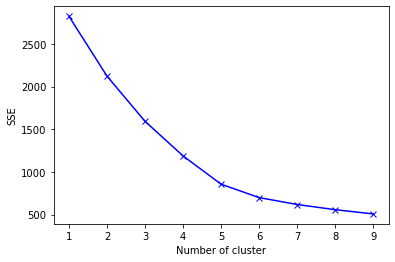

In [111]:
#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

* We don't see a marked dip but rather a gradual descending curve here
* We will look at the Silhouette scores to see how it varies with k

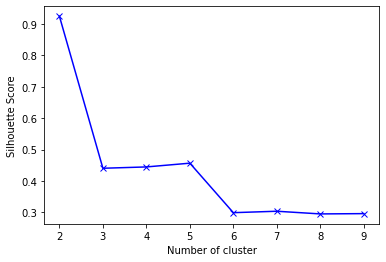

In [112]:
#Empty dictionary to store the silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

The Silhoutte score is highest for k=2, so we will go with 2 clusters

In [113]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
df_final['KMeans_Labels'] = kmeans.predict(data_scaled)

In [114]:
df_final['KMeans_Labels'].value_counts()

0    705
1      1
Name: KMeans_Labels, dtype: int64

This looks like a very skewed clustering with 1 observation in one cluster and more than 700 in other. Let's check out the profiles of these clusters

In [115]:
#Calculating mean and median of the original data for each label
mean = df_final.groupby('KMeans_Labels').mean()
median = df_final.groupby('KMeans_Labels').median()
data_kmeans = pd.concat([mean, median], axis=0)
data_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']
data_kmeans.T

,group_0 Mean,group_1 Mean,group_0 Median,group_1 Median
avg_prop_tax,8884.316310,8884.316310,8884.31631,8884.316310
2019-20 Budgeted Per Pupil Amount,17952.435717,16957.000000,17101.00000,16957.000000
2019-20 Extra_curricular Actual Per Pupil Amount,351.644558,351.644558,330.00000,351.644558
2019-20 Student/Teacher Ratio,11.180889,826.900000,11.20000,826.900000


Clearly cluster 1 comprises of the richer towns with the higher average property taxes and seems to have the higher per student budgetary allocations, and S/T ratios

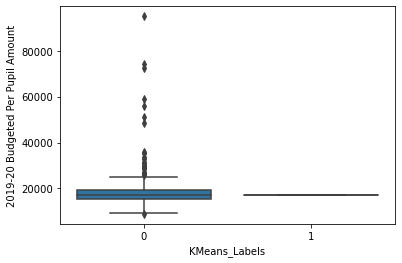

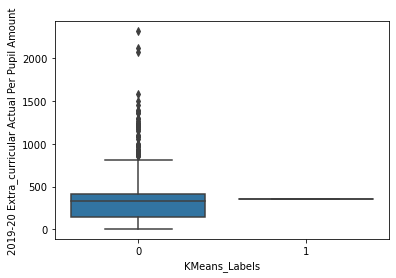

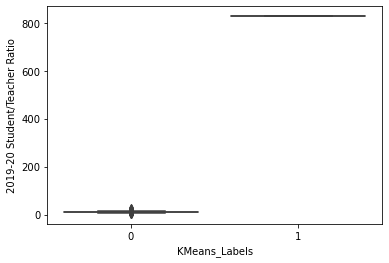

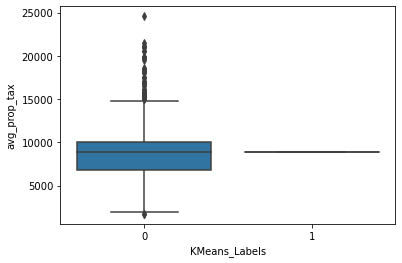

In [116]:
cols_visualise = [ '2019-20 Budgeted Per Pupil Amount',  '2019-20 Extra_curricular Actual Per Pupil Amount', '2019-20 Student/Teacher Ratio', 'avg_prop_tax']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = df_final)
    plt.show()

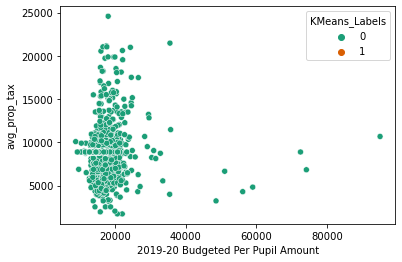

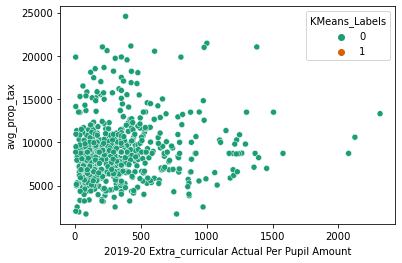

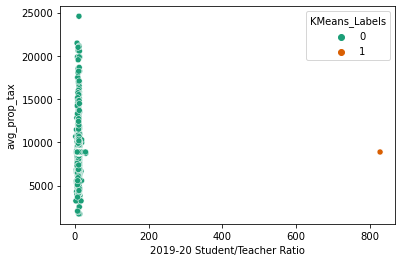

In [117]:
cols_visualise = [ '2019-20 Budgeted Per Pupil Amount',  '2019-20 Extra_curricular Actual Per Pupil Amount', '2019-20 Student/Teacher Ratio']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'avg_prop_tax',data = df_final ,hue='KMeans_Labels', palette='Dark2')
    plt.show()

## Gaussian Mixture Clustering

In [118]:
gmm = GaussianMixture(n_components = 2, random_state = 1)
gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
df_final['GmmLabels'] = gmm.predict(data_scaled)

In [119]:
df_final.GmmLabels.value_counts()

1    679
0     27
Name: GmmLabels, dtype: int64

In [120]:
#Calculating mean and median of the original data for each label
original_features = [ '2019-20 Budgeted Per Pupil Amount',  '2019-20 Extra_curricular Actual Per Pupil Amount', '2019-20 Student/Teacher Ratio', 'avg_prop_tax']

mean = df_final.groupby('GmmLabels').mean()
median = df_final.groupby('GmmLabels').median()
data_gmm = pd.concat([mean, median], axis=0)
data_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']
data_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_0 Median,group_1 Median
2019-20 Budgeted Per Pupil Amount,33307.148148,17340.399382,23986.000000,17038.00000
2019-20 Extra_curricular Actual Per Pupil Amount,588.471655,342.227280,351.644558,314.00000
2019-20 Student/Teacher Ratio,43.118519,11.112263,8.800000,11.20000
avg_prop_tax,8698.228263,8891.715982,8884.316310,8884.31631


Clearly cluster 1 comprises of the richer towns with the higher average property taxes and seems to have the higher per student budgetary allocations, and S/T ratios

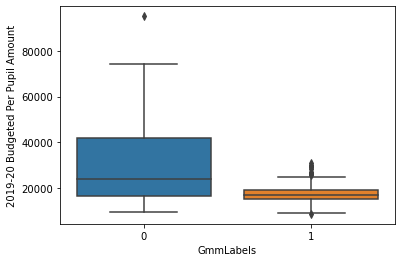

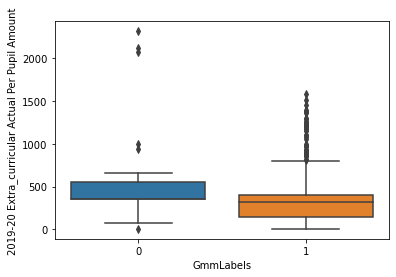

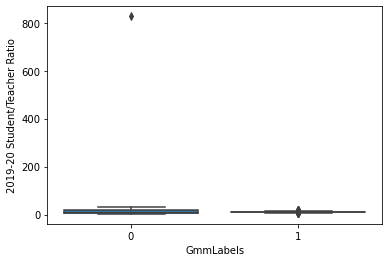

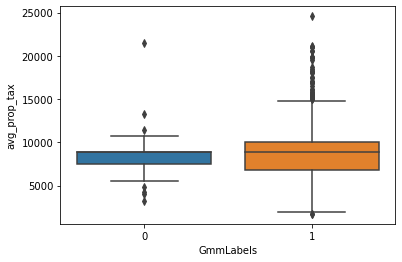

In [121]:
cols_visualise = [ '2019-20 Budgeted Per Pupil Amount',  '2019-20 Extra_curricular Actual Per Pupil Amount', '2019-20 Student/Teacher Ratio', 'avg_prop_tax']

for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = df_final)
    plt.show()

## DB Scan

In [122]:
dbs = DBSCAN(eps = 1)
data_scaled_copy['DBSLabels'] = dbs.fit_predict(data_scaled)
df_final['DBSLabels'] = dbs.fit_predict(data_scaled)

In [123]:
df_final['DBSLabels'].value_counts()

 0    682
-1     24
Name: DBSLabels, dtype: int64

* 2 Distinct clusters created here - but skewed

In [125]:
#Calculating mean and median of the original data for each label
original_features = ['2019-20 Budgeted Per Pupil Amount',  '2019-20 Extra_curricular Actual Per Pupil Amount', '2019-20 Student/Teacher Ratio', 'avg_prop_tax']

mean = df_final.groupby('DBSLabels').mean()
median = df_final.groupby('DBSLabels').median()
data_hierachical = pd.concat([mean, median], axis=0)
data_hierachical.index = ['group_-1 Mean', 'group_0 Mean', 'group_-1 Median', 'group_0 Median']
data_hierachical[original_features].T

,group_-1 Mean,group_0 Mean,group_-1 Median,group_0 Median
2019-20 Budgeted Per Pupil Amount,37628.708333,17258.555983,29500.500000,16968.500000
2019-20 Extra_curricular Actual Per Pupil Amount,818.205570,335.225988,703.500000,314.000000
2019-20 Student/Teacher Ratio,41.787500,11.299893,8.100000,11.200000
avg_prop_tax,10644.651359,8822.369035,9744.158155,8882.658155


First cluster has higher property tax and budgetary allocations, but S/T ratio is better for second group comprising the towns with lower property taxes and per student budgetary allocations

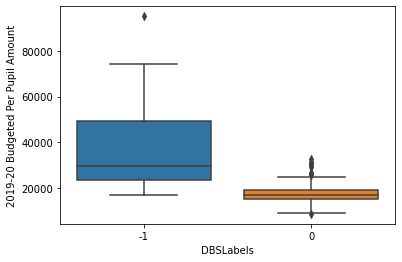

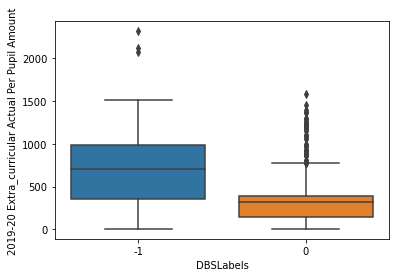

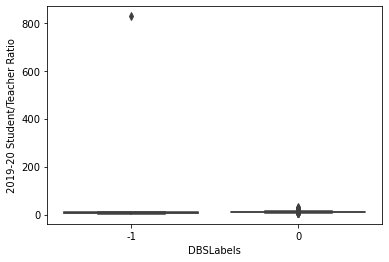

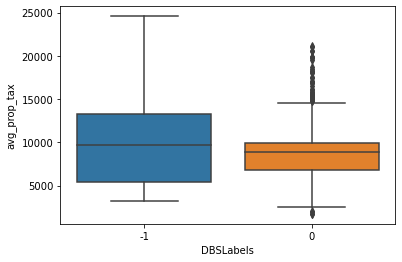

In [126]:
for col in cols_visualise:
    sns.boxplot(x = 'DBSLabels', y = col, data = df_final)
    plt.show()

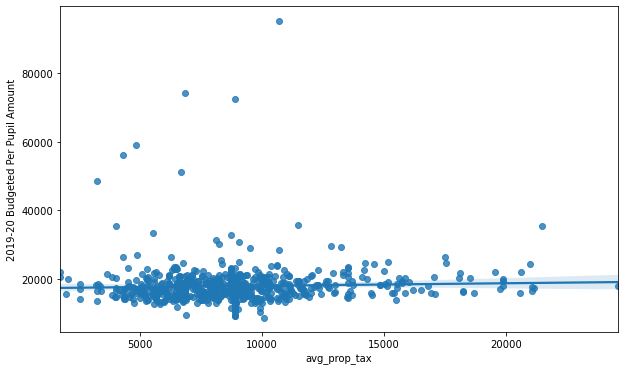

In [127]:
#Checking the relationship of property taxes with the total expense/pupil for Year1

plt.figure(figsize=(10,6))
sns.regplot(x='avg_prop_tax', y='2019-20 Budgeted Per Pupil Amount', data=df_final)
plt.show()

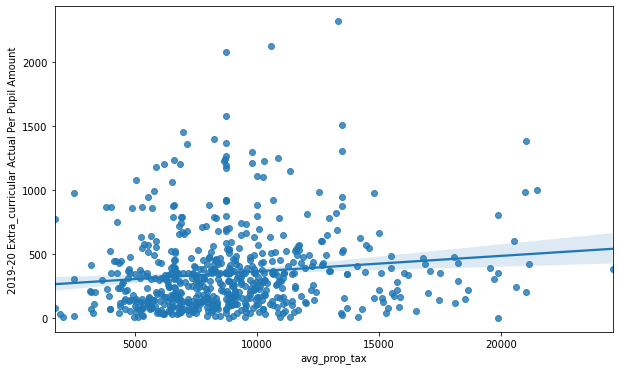

In [128]:
plt.figure(figsize=(10,6))
sns.regplot(x='avg_prop_tax', y='2019-20 Extra_curricular Actual Per Pupil Amount', data=df_final)
plt.show()

Text(0.5, 1.0, 'Average Property Tax by Town')

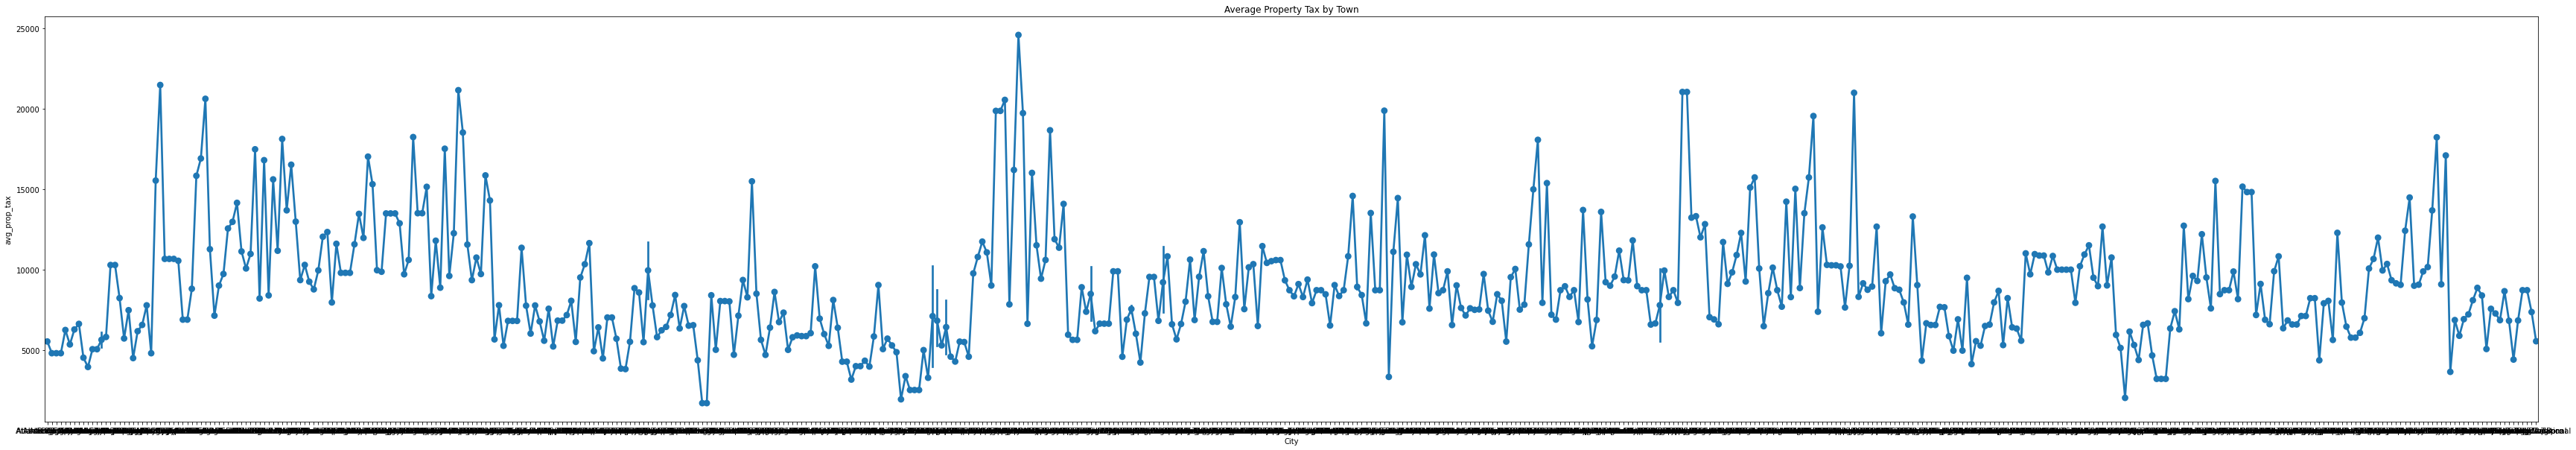

In [129]:
plt.figure(figsize=(60,10))
sns.pointplot(x='City',y='avg_prop_tax',data=df)
plt.title('Average Property Tax by Town')

In [130]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("K-means")

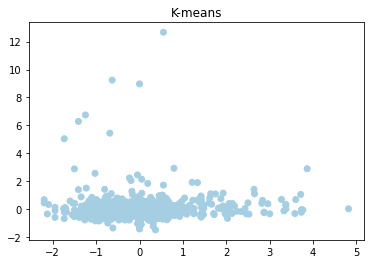

In [131]:
kmeans(df_final, n_clusters = 2)

In [132]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

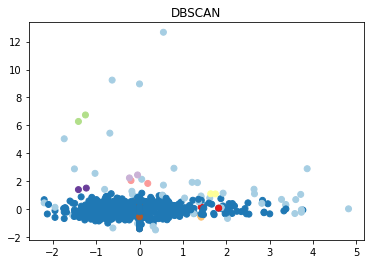

In [133]:
dbscan(df_final, eps=.5, min_samples=2)

## K-Medoids

In [134]:
from sklearn_extra.cluster import KMedoids 

In [138]:
kmedo = KMedoids(n_clusters = 3, random_state=1)
kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
df_final['kmedoLabels'] = kmedo.predict(data_scaled)

In [139]:
df_final.kmedoLabels.value_counts()

1    272
0    244
2    190
Name: kmedoLabels, dtype: int64

In [140]:
#Calculating mean and median of the original data for each label

original_features = ['2019-20 Budgeted Per Pupil Amount',  '2019-20 Extra_curricular Actual Per Pupil Amount', '2019-20 Student/Teacher Ratio', 'avg_prop_tax']

mean = df_final.groupby('kmedoLabels').mean()
median = df_final.groupby('kmedoLabels').median()
data_kmedoids = pd.concat([mean, median], axis=0)
data_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
data_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
2019-20 Budgeted Per Pupil Amount,17732.639344,16216.187784,20715.037384,17068.0,15801.000000,18747.5
2019-20 Extra_curricular Actual Per Pupil Amount,157.187981,508.389012,376.975680,133.0,351.644558,343.5
2019-20 Student/Teacher Ratio,10.562705,15.248829,10.444448,10.5,11.700000,10.6
avg_prop_tax,6503.268986,8352.348284,12703.636573,6575.5,8884.316310,11681.5


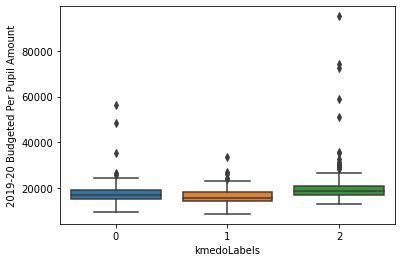

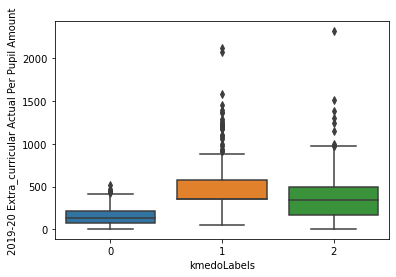

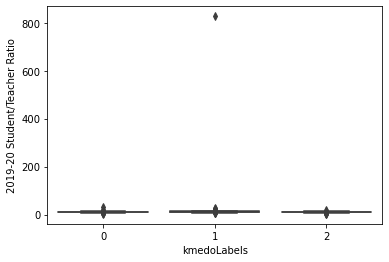

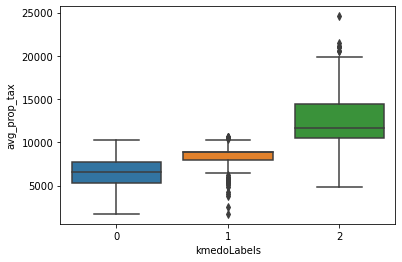

In [141]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = df_final)
    plt.show()